In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

In [2]:
#Reading the dataset - Advertising - Building Regression Model to predict the sales
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
#checking null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [4]:
#checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
#checking statistical vales - Mean, Median, std dev, etc.
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


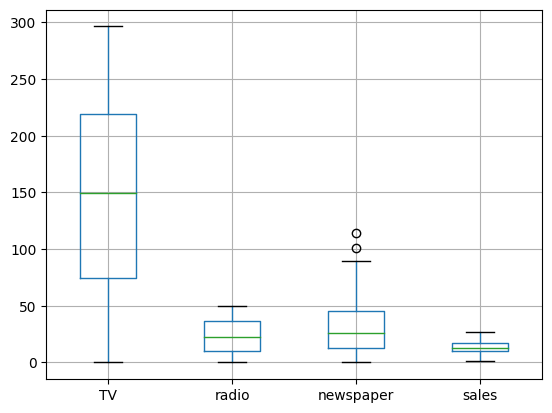

In [6]:
#checking for outliers - plotting boxplot
df.boxplot(column =['TV', 'radio', 'newspaper', 'sales'])
plt.show()

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


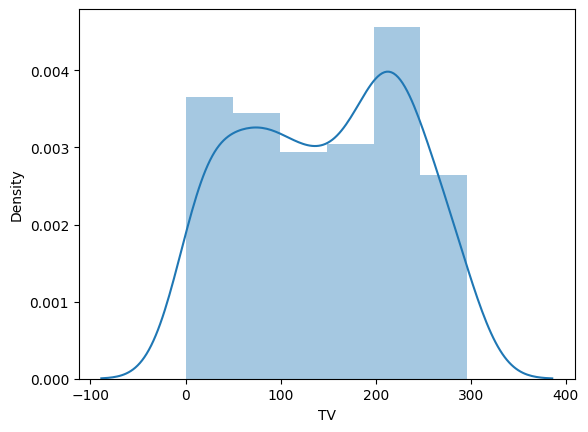

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


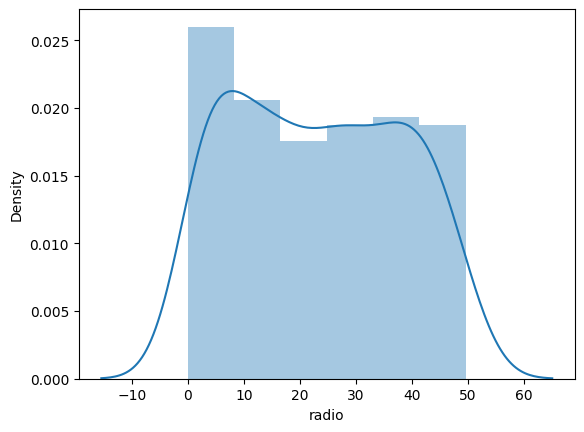

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


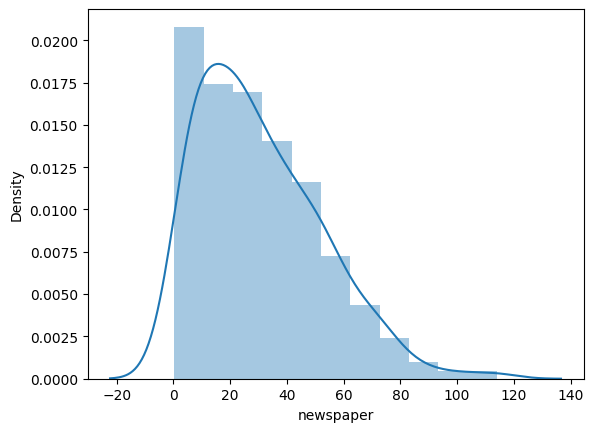

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


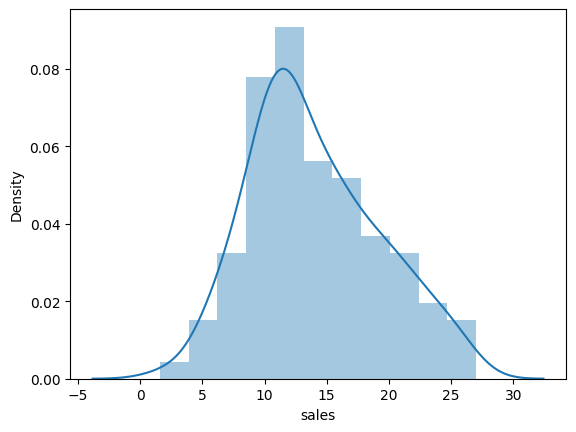

In [7]:
#Handling Outlier
def distplots(col):
    sns.distplot(df[col])
    plt.show()
for i in list(df.columns)[0:]:
    distplots(i)

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


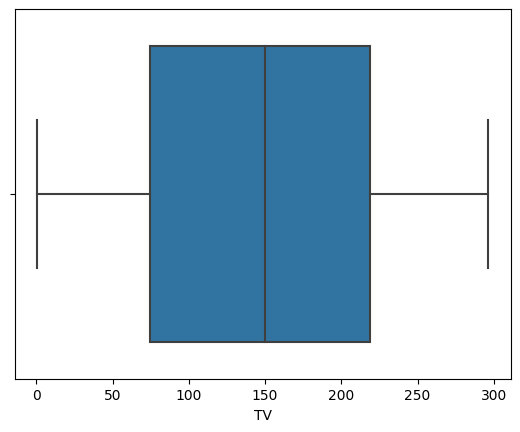

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


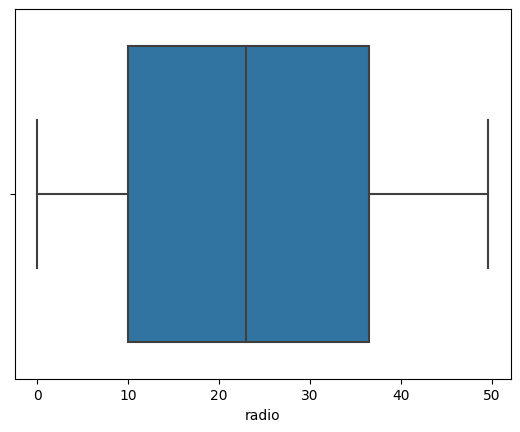

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


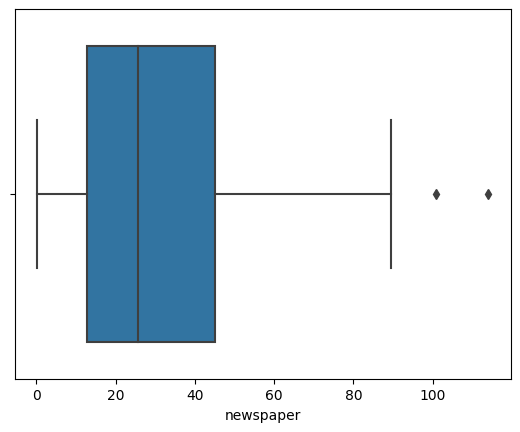

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


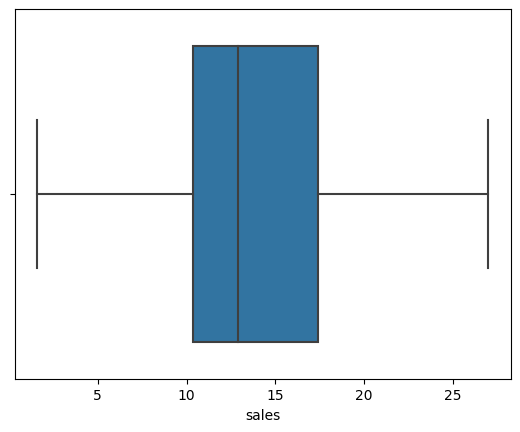

In [8]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
for i in list(df.select_dtypes(exclude = 'object').columns)[0:]:
    boxplots(i)

In [9]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [10]:
#Applying capping method on outliers - Newspaper column detected with oulier
new_df = df.copy()

In [11]:
q1 = df['newspaper'].quantile(0.25)
q1

12.75

In [12]:
q3 = df['newspaper'].quantile(0.75)
q3

45.1

In [13]:
iqr_val = q3 - q1
iqr_val

32.35

In [14]:
upper = q3 + 1.5*iqr_val
upper

93.625

In [15]:
lower = q1 - 1.5*iqr_val
lower

-35.775000000000006

In [16]:
new_df['newspaper'] = np.where(new_df['newspaper'] > upper, upper, np.where(new_df['newspaper']<lower, lower, new_df['newspaper']))

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


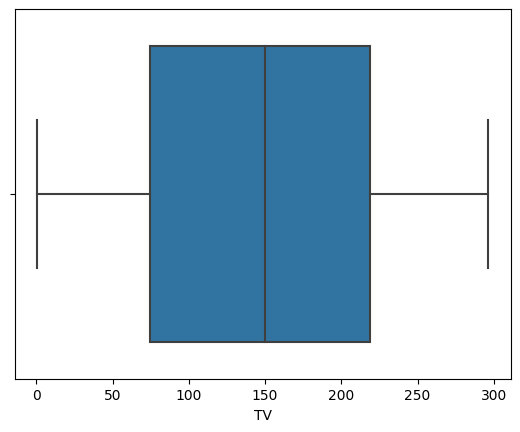

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


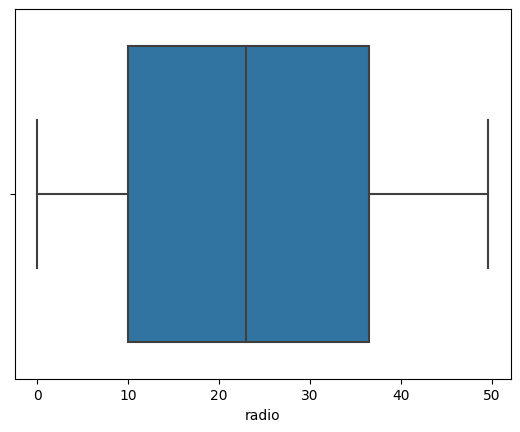

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


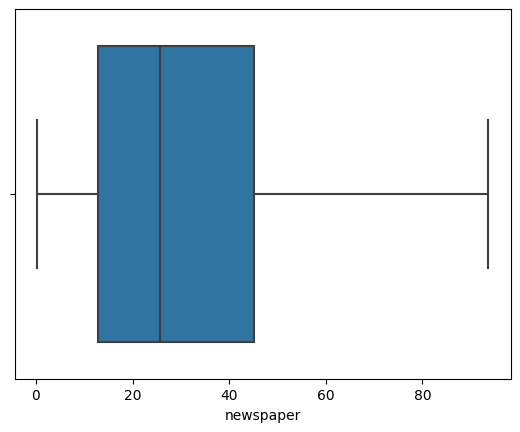

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


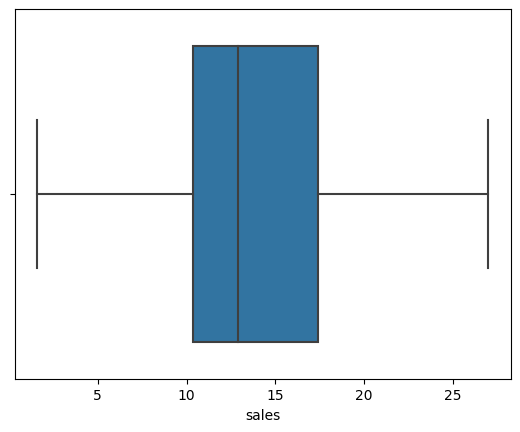

In [17]:
def boxplots(col):
    sns.boxplot(new_df[col])
    plt.show()
for i in list(df.select_dtypes(exclude = 'object').columns)[0:]:
    boxplots(i)

In [18]:
#feature scaling
#splitting the data into dependent variable and independent variable
x = new_df.iloc[:,0:-1]
y = new_df['sales']

In [19]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [20]:
x.head(20)

,TV,radio,newspaper
0,230.1,37.8,69.200
1,44.5,39.3,45.100
2,17.2,45.9,69.300
3,151.5,41.3,58.500
4,180.8,10.8,58.400
5,8.7,48.9,75.000
6,57.5,32.8,23.500
7,120.2,19.6,11.600
8,8.6,2.1,1.000
9,199.8,2.6,21.200


In [21]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2
0,0.969852,0.981522,1.823979
1,-1.197376,1.082808,0.690583
2,-1.516155,1.528463,1.828682
3,0.052050,1.217855,1.320770
4,0.394182,-0.841614,1.316067
...,...,...,...
195,-1.270941,-1.321031,-0.781420
196,-0.617035,-1.240003,-1.049484
197,0.349810,-0.942899,-1.129433
198,1.594565,1.265121,1.682892


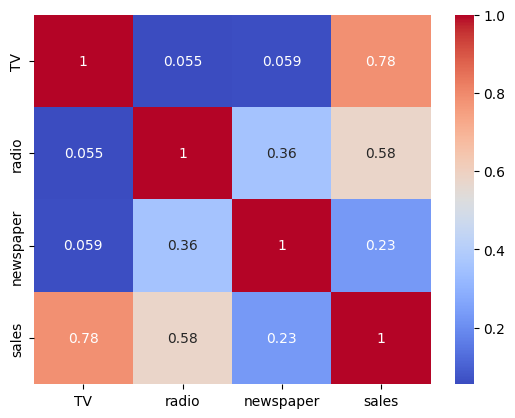

In [23]:
#correlation
corr = new_df.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

In [24]:
#check multicollinearity
variable = sc_x
variable.shape

(200, 3)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = sc_x
vif = pd.DataFrame()

vif['variance_inflation_factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = x.columns

In [26]:
vif

,variance_inflation_factor,Features
0,1.004843,TV
1,1.146581,radio
2,1.147174,newspaper


In [27]:
#since vif is less than 5 -- no multicollinearlity present

# Splitting the dataset into training and test to build the  model for prediction

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(150, 3) (50, 3) (150,) (50,)


# Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [31]:
print(lm.intercept_)
print()
print(lm.coef_)

2.962849028189071

[0.04495487 0.19019438 0.00020572]


In [32]:
x.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [33]:
#predicting sales price by using lm model with test dataset
y_pred = lm.predict(x_test)
y_pred_train = lm.predict(x_train)
y_pred

array([15.72598139, 19.56168247, 11.35557653, 17.00075882,  9.05816171,
        6.88267108, 20.2533618 , 17.23769443,  9.63323772, 19.19764748,
       12.3384156 , 13.79090643, 13.61016736, 21.3123177 , 18.41904026,
        9.88358444, 15.45117552,  7.53282429,  7.42063244, 20.38946996,
        7.6703687 , 18.22209034, 24.71995609, 22.84210877,  7.83372777,
       12.54155199, 21.43035276,  7.93335817, 12.31293953, 12.48025113,
       10.7221545 , 19.22471856,  9.93415338,  6.59054758, 17.2803142 ,
        7.62392527,  9.13253528,  8.13121633, 10.51629212, 10.49899412,
       12.99116379,  9.63893335, 10.11038657,  7.94558682, 11.4801784 ,
        9.97647532,  8.89435106, 16.19193149, 13.15680234, 20.83018461])

In [34]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
Name: sales, dtype: float64

In [35]:
#validating actual test data and predicted 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9246921679977127

In [36]:
r2_score(y_train, y_pred_train)

0.8865132005937248

# Using OLS(ordinary least square) method

In [37]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [38]:
reg_model = smf.OLS(endog = y_train, exog = x_train).fit()

In [39]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2598.
Date:                Sat, 22 Jul 2023   Prob (F-statistic):                   4.42e-127
Time:                        11:25:21   Log-Likelihood:                         -321.29
No. Observations:                 150   AIC:                                      648.6
Df Residuals:                     147   BIC:                                      657.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0529      0.002     33.291      0.000       0.050       0.056
radio          0.2250      0.011     20.697      0.000       0.203       0.246
newspaper      0.0177      0.008      2.208      0.029       0.002       0.034
==============================================================================
Omnibus:                        7.836   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.020   Jarque-Bera (JB):               10.748
Skew:                          -0.288   Prob(JB):                      0.00464
Kurtosis:                       4.178   Cond. No.                         12.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#Durbin-watson value = 2 --- No autocorrelation in Linear Regression Model

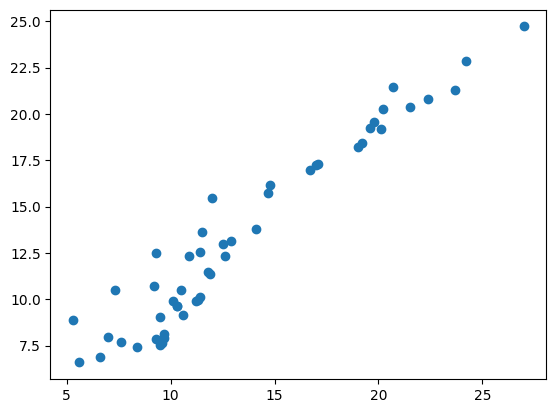

In [41]:
#check linearlity 
plt.scatter(y_test, y_pred)
plt.show()

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


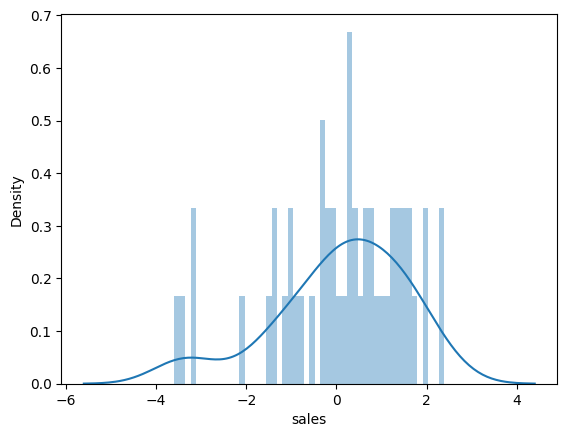

In [42]:
#Normality of residual

sns.distplot((y_test - y_pred), bins = 50)
plt.show()

# Lasso Regression

In [43]:
from sklearn.linear_model import Lasso

In [44]:
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train, y_train)
print("Lasso Model: ", (lasso.coef_))

Lasso Model:  [4.49478530e-02 1.89794037e-01 6.81359411e-05]


In [45]:
y_pred_train_lasso = lasso.predict(x_train)

In [46]:
y_pred_test_lasso = lasso.predict(x_test)

In [47]:
print("Training Accuracy:", r2_score(y_train, y_pred_train_lasso))
print()
print("Test Accuracy: ", r2_score(y_test, y_pred_test_lasso))

Training Accuracy: 0.8865111528057975

Test Accuracy:  0.9247557802256093


# ElasticNet

In [48]:
from sklearn.linear_model import ElasticNet

In [49]:
elastic = ElasticNet(alpha = 0.3, l1_ratio =0.1)

In [50]:
elastic.fit(x_train, y_train)

ElasticNet(alpha=0.3, l1_ratio=0.1)

In [51]:
y_pred_train_elastic = elastic.predict(x_train)

In [52]:
y_pred_test_elastic = elastic.predict(x_test)

In [53]:
print("Training Accuracy:", r2_score(y_train, y_pred_train_elastic))
print()
print("Test Accuracy: ", r2_score(y_test, y_pred_test_elastic))

Training Accuracy: 0.886512058553848

Test Accuracy:  0.9247326351270653


# Regularization

In [54]:
#Ridge Method

In [55]:
from sklearn.linear_model import Ridge

In [56]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)
print("Ridge Model :", (ridge.coef_))

Ridge Model : [0.04495486 0.19019245 0.00020612]


In [57]:
y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)

In [58]:
print("Training Accuracy :", r2_score(y_train, y_pred_train_ridge))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_ridge))


Training Accuracy : 0.8865132005661287

Test Accuracy : 0.9246923316511205


Performance Matrix

In [59]:
#Mean Absolute Error

In [60]:
from sklearn import metrics
print("MAE :", metrics.mean_absolute_error(y_test, y_pred))

MAE : 1.1382186233490834


In [61]:
#Mean Absolute Percent Error

In [62]:
print("MAPE :", metrics.mean_absolute_error(y_test, y_pred)/100)

MAPE : 0.011382186233490833


In [63]:
#Mean Squared Error

In [64]:
print("MSE :", metrics.mean_squared_error(y_test, y_pred)/100)

MSE : 0.021081686539973426


In [65]:
#Root mean squared error

In [66]:
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 1.4519533925017505


# Gradient Descent

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.25, random_state=101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(150, 3) (50, 3) (150,) (50,)


In [68]:
from sklearn.linear_model import SGDRegressor
gd_model = SGDRegressor()
gd_model.fit(x_train, y_train)

SGDRegressor()

In [69]:
y_pred_gd_train = gd_model.predict(x_train)
y_pred_gd_test = gd_model.predict(x_test)

In [70]:
print("GD Training Accuracy :", r2_score(y_train, y_pred_gd_train))
print()
print("GD Test Accuracy :", r2_score(y_test, y_pred_gd_test))

GD Training Accuracy : 0.8864742285516076

GD Test Accuracy : 0.9245818684808065
